# Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [128]:
from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [129]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [130]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [131]:
print(clf.predict([[0, 1, 1]]))

[0]


In [132]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


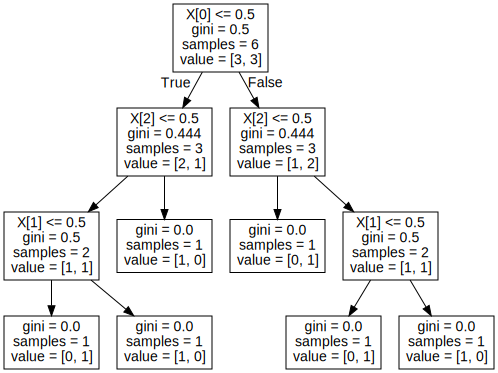

In [133]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [134]:
from sklearn.datasets import load_iris
iris = load_iris()
print(len(iris.data))

150


# Declare the type of prediction model and the working criteria for the model induction algorithm

In [135]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [136]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
print(indices)

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]
print(indices_training)
print(indices_test)

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28
  55  75  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49
 136  99  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36
  21   9 103  67 117  47]
[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139 

# Fit the learning model on training set

In [137]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [138]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [139]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [140]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

# Obtain model performance results

In [141]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [142]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [143]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [144]:
#todo uncomment
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None)
# graph = graphviz.Source(dot_data)
# graph.render("my_iris_predictions")

## 2. Generate a picture here

In [145]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


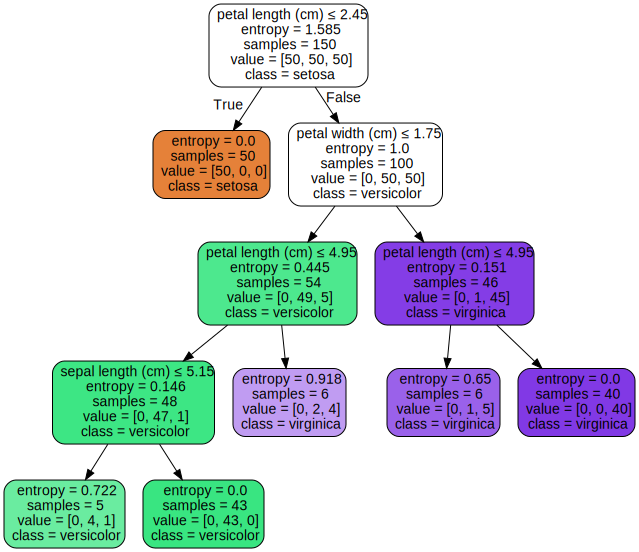

In [146]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
#help(tree._tree.Tree)

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica or versicolor which are more difficult to discriminate). Learn the tree in these conditions.
1.b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor or vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
2. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
3. build the confusion matrix of the created tree models on the test set and show them. 
4. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

# Svolgimento

In [147]:
import time

start = time.time()
# operations
end = time.time()
print('time:', end - start)

time: 3.600120544433594e-05


# Point 1
Get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica or versicolor which are more difficult to discriminate). Learn the tree in these conditions.

Build the inflated dataset

In [148]:
# Merge toghether features and labels to have for each example an array with the features in the first positions and the class in the last.
iris_staked = np.column_stack((iris_X_train, iris_y_train))

# Take instances of class "versicolor" (class 1)
instances = [inst for inst in iris_staked if inst[4] == 1]

# Repeat 10 times the instances selected to have inflation
repetitions = 10
rep_versicolor = np.repeat(instances, repetitions, axis=0)

# Add new instances to iris dataset
# concatenate standard dataset with repetitions
iris_infl = np.concatenate([iris_staked, rep_versicolor])
# shuffle the dataset
np.random.shuffle(iris_infl)

Plot the distribution of examples in the new dataset

Text(0.5, 1.0, 'Iris Class Distribution')

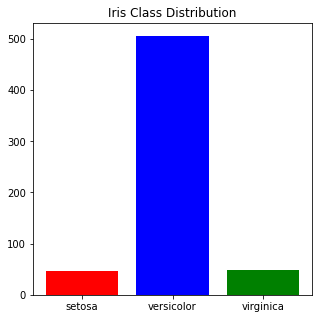

In [149]:
from matplotlib import pyplot as plt

class_distrib = np.bincount(iris_infl[:,4].astype(int))

fig, axes = plt.subplots(1,1,figsize=(5,5))

bins=[0,1,2]
axes.bar(bins, class_distrib, tick_label=['setosa','versicolor','virginica'], color=['red', 'blue', 'green'])
axes.set_title("Iris Class Distribution")

In [150]:
# ------------ Con Cross Validation ------------

# Fit del DT usando un unico dataset (iris_infl) e calcolo dell'accuracy con la Cross Validation

from sklearn.model_selection import cross_val_score  # will be used to separate training and test

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=27, min_samples_leaf=5, class_weight={0: 1, 1: 1, 2: 1})
clf = clf.fit(iris_infl[:,:3], iris_infl[:,4])

scores = cross_val_score(clf, iris_infl[:,:3], iris_infl[:,4], cv=5)  # score will be the accuracy
print(scores)
# computes F1- score
f1_scores = cross_val_score(clf, iris_infl[:,:3], iris_infl[:,4], cv=5, scoring='f1_macro')
print(f1_scores)


# NOTE:
# the accuracy and the F1 score are higher with Cross Validation compared to manual division of training and test set (80:20), sign that the cross validation have a good impact to the model's training

# ------------ Fine Cross Validation ------------

[0.99166667 0.96666667 0.975      0.96666667 0.975     ]
[0.97876614 0.91019417 0.93629842 0.91019417 0.92845528]


Split the inflated dataset in Training Set (80%) and Test Set (20%)

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test_infl = train_test_split(iris_infl[:,:3], iris_infl[:,4], train_size=0.8, random_state=27)

print("Training data: ",len(X_train))
print("Training labels: ",len(y_train))

print("Test data: ",len(X_test))
print("Test labels: ",len(y_test_infl))

Training data:  480
Training labels:  480
Test data:  120
Test labels:  120


Train the model

In [152]:
# Fit the DT on training set(X_train, y_train)
clf_infl = tree.DecisionTreeClassifier(criterion="entropy", random_state=27, min_samples_leaf=5, class_weight={0: 1, 1: 1, 2: 1})
clf_infl = clf_infl.fit(X_train, y_train)

# Obtaining predictions
predicted_y_test_infl = clf_infl.predict(X_test)

Calculate accuracy

In [153]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc_score_infl = accuracy_score(y_test_infl, predicted_y_test_infl)
print("Accuracy score: "+ str(acc_score_infl))
f1_infl = f1_score(y_test_infl, predicted_y_test_infl, average='macro')
print("F1 score: "+str(f1_infl))

Accuracy score: 0.975
F1 score: 0.9475500345065563


NOTE:
The differnces respect to the non-inflated dataset is that the accuracy is better (previously was 0.9) and the F1 score is also higher (previously was 0.88571), evidences that giving more examples made a better classifier (the DT improved to recognize the problematic class 'versicolor')

## Point 1.b
Modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor or vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.

In [154]:
# we take the non inflated dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8, random_state=27)

# learn the classifier using 10 as weight for class 2
clf_weights = tree.DecisionTreeClassifier(criterion="entropy", random_state=27, min_samples_leaf=5, class_weight={0: 1, 1: 10, 2: 1})
# todo mettendo anche 2:10 l'accuracy/f1 aumenta a 0.9/0.913
clf_weights = clf_weights.fit(X_train, y_train)

# compute predictions
predicted_y_test_weights = clf_weights.predict(X_test)

# calculate the accuracy
acc_score_weights = accuracy_score(y_test, predicted_y_test_weights)
print("Accuracy score: "+ str(acc_score_weights))
f1_weights = f1_score(y_test, predicted_y_test_weights, average='macro')
print("F1 score: "+str(f1_weights))

Accuracy score: 0.8666666666666667
F1 score: 0.8838383838383838


NOTE:
We see that results are comparable to the previous step, so using more examples in the dataset (inflation) or weighting more some examples (this case) are two ways to reach the same goal (focus on some exacts classes to see if they are difficult to recognize)

# Point 2
Learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.

In [155]:
# load the original dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8, random_state=27)

# learn the classifier using tuned hyperparameters
clf_hyp = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=27,
                                  class_weight={0: 1, 1: 1, 2: 1},
                                  min_samples_leaf=5, # tuned
                                  max_depth=3, # tuned
                                  min_impurity_decrease=0.4, # tuned
                                  max_leaf_nodes=3, # tuned
                                  )
'''
# by using this model (similar to the ones used before) we obtain a lower accuracy:
# Accuracy score: 0.8666666666666667
# F1 score: 0.8838383838383838
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=27,
                                  class_weight={0: 1, 1: 1, 2: 1}
                                  )
'''
clf_hyp = clf_hyp.fit(X_train, y_train)

# compute predictions
predicted_y_test_hyp = clf_hyp.predict(X_test)

# calculate the accuracy
acc_score_hyp = accuracy_score(y_test, predicted_y_test_hyp)
print("Accuracy score: "+ str(acc_score_hyp))
f1_hyp = f1_score(y_test, predicted_y_test_hyp, average='macro')
print("F1 score: "+str(f1_hyp))

Accuracy score: 0.9
F1 score: 0.9130434782608695


NOTE:
tuning the hyper-parameters is important because they bring the model to have better accuracy, more generalization and less training time

# Point 3
Build the confusion matrix of the created tree models on the test set and show them.

In [195]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from IPython import display

# confusion matrix for inflated classifier
cm_infl = confusion_matrix(y_test_infl, predicted_y_test_infl)
df_infl = pd.DataFrame(cm_infl, index=['setosa', 'versicolor', 'virginica'], columns=['predicted setosa', 'predicted versicolor', 'predicted virginica'])

# confusion matrix for weighted classifier
cm_weights = confusion_matrix(y_test, predicted_y_test_weights)
df_weights = pd.DataFrame(cm_weights, index=['setosa', 'versicolor', 'virginica'], columns=['predicted setosa', 'predicted versicolor', 'predicted virginica'])

# confusion matrix for tuned hyper-parameters classifier
cm_hyp = confusion_matrix(y_test, predicted_y_test_hyp)
df_hyp = pd.DataFrame(cm_hyp, index=['setosa', 'versicolor', 'virginica'], columns=['predicted setosa', 'predicted versicolor', 'predicted virginica'])

print('With inflation')
display.display(df_infl)
print('With higher weights')
display.display(df_weights)
print('With tuned hyper-parameters')
display.display(df_hyp)

With inflation


,predicted setosa,predicted versicolor,predicted virginica
setosa,6,0,0
versicolor,0,102,0
virginica,0,3,9


With higher weights


,predicted setosa,predicted versicolor,predicted virginica
setosa,7,0,0
versicolor,0,10,1
virginica,0,3,9


With tuned hyper-parameters


,predicted setosa,predicted versicolor,predicted virginica
setosa,7,0,0
versicolor,0,10,1
virginica,0,2,10


# Point 4
Build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.